# 01. PyTorch Workflow

## Table of Contents

- [All Links in Document](#links)
- [PyTorch Workflow](#workflow)
- [Loading and Preparing Data](#loadprep)
- [Building a Model](#buildmodel)

## All Links in Document <a name="links"></a>

- https://pytorch.org/docs/stable/nn.html
- https://realpython.com/python3-object-oriented-programming/
- https://pytorch.org/docs/stable/generated/torch.nn.Module.html
- What is a Neural Network?: https://www.youtube.com/watch?v=aircAruvnKk
- Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
- Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U

## PyTorch Workflow <a name="workflow"></a>

There are many different workflows to follow for a project. This section of the document will explore one example workflow. The workflow changes depending on which steps are necessary. The below image shows a typical workflow with example steps.

<img src="images/01_workflow.png" width="750" />

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.13.1+cu117'

torch.nn houses all the necessary tools and building blocks for working with neural networks. The docs are found at https://pytorch.org/docs/stable/nn.html

## Loading and Preparing Data  <a name="loadprep"></a>

Data can be almost anything in machine learning. Example data formats are:
- Excel spreadsheet
- An image
- Videos
- Audio
- DNA
- Textual sequences

Machine learning is a game of 2 steps:
- Convert data into numerical representation
- Find patterns in the numerical data with a model

Example linear regression formula: $Y_i=f(X_i,\beta)+\epsilon_i$

In [3]:
# Manually creating some data using a linear regression
# Known parameters
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

Bias = intercept, weight = slope

In [4]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

It's also necessary to split the dataset into various smaller datasets. This is always a split between a training and testing dataset, and occasionally a validation dataset as well. The splitting is done according to a test design, which determines the percentage of data to use for each split. Common ratios between training, validation, and testing datasets are:
- 80:10:10
- 70:15:15
- 60:20:20

In a school analogy, the training set equates to the course materials to study on, the validation set equates to a practice exam (which is optional), and the testing set equates to the final exam.

<img src="images/01_traintestsplit.png" />

In [5]:
# Manually creating a simple train/test split with an 80:20 ratio
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
# Simple visualization function
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    if predictions:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend()

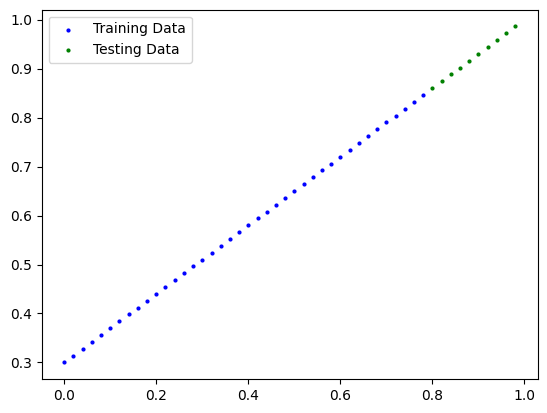

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

## Building a Model <a name="buildmodel"></a>

What is a Neural Network?: https://www.youtube.com/watch?v=aircAruvnKk

A neuron is essentially "a thing that holds a number", specifically a number between 0 and 1. Using a neural network that uses images as input as an example, a neuron here would correspond to a pixel. If an image of size 28x28 is used, that totals to 784 pixels and thus 784 neurons. Each neuron has an "activation", which refers to the numerical value of the neuron. As mentioned, this ranges from 0 to 1. In an example greyscale image, this could refer to the shade of the pixel, with 0 being black and 1 being white. A 28x28 image thus has 784 pixels, meaning 784 neurons, and 784 activations. This is what the input layer will consist of. Each neuron will also have a weight associated with it, which is a random number representing the importance of said for another neuron in the next layer. This gets adjusted over time as the neural networks learns.

What happens inside the hidden layers is explained later. For each of the neurons inside the next hidden layer, a calculation is made based on the weights, activations, and optional bias of neurons in the previous layer. At the beginning of the neural network, this calculation is logically made on the input layer. Assume the following structure:

<img src="images/01_nnexample.png" />

An example formula of the calculation made for the first neuron of layer on the right (the first hidden layer) would be:

$a_1=\sigma(w_1x_1 + w_2x_2 + ... + w_nx_n + b_0)$

where; $a_1$ is the first neuron of the hidden layer, $\sigma$ is the sigmoid function, $w$ is the weight of a specific activation, $x$ is a specific activation, and $b$ is the bias.

The output of such a formula is a totally random number as the weights are random, the activations are random, and the bias is any arbitrary number as well. The result of this weighted sum can be squished into a number between 0 and 1 to make its output legible. This is done with the sigmoid function in the formula. The end result is then fed to the neuron of the input layer. This process is repeated for all neurons of the input layer for every neuron of the next hidden layer.

The formula can also be displayed in matrix multiplication form:

<img src="images/01_nnmatmul.png" />

The entire transition of activations from one layer to the next can be summarized to a small expression:

$a^\text{(1)} = \sigma(Wa^\text{(0)}+b)$

where; $a^\text{(1)}$ is the first hidden layer, $W$ represents the weights, $a^\text{(0)}$ is the input layer, $b$ are all the biases, and $\sigma$ is again the sigmoid function. How the hidden layers work and how the neural network learns is handled in another topic.

Extra OOP classes help if necessary: https://realpython.com/python3-object-oriented-programming/

The documentation at https://pytorch.org/docs/stable/generated/torch.nn.Module.html states:
- Base class for all neural network modules.
- Your models should also subclass this class.

In [8]:
# Create linear regression model class from scratch
# Almost everything in PyTorch inherits from nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

What this model does:
- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values

It does this through two main algorithms:
- Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
- Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U

Gradient Descent: https://www.youtube.com/watch?v=IHZwWFHWa-w

<img src="images/01_linear_model.png" />